In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cardata.csv")
df

,Car Model,Horsepower,Weight,MPG,Price
0,Car A,130,3500,22,20000
1,Car B,165,3700,18,25000
2,Car C,150,3400,20,23000
3,Car D,180,4000,16,27000
4,Car E,140,3300,24,21000
...,...,...,...,...,...
73,Car BV,170,3750,18,25500
74,Car BW,180,4050,17,27500
75,Car BX,165,3400,22,24500
76,Car BY,150,3250,24,23000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Car Model   78 non-null     object
 1   Horsepower  78 non-null     int64 
 2   Weight      78 non-null     int64 
 3   MPG         78 non-null     int64 
 4   Price       78 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.2+ KB


In [4]:
X = df.drop(['Car Model', 'Price'], axis =1)
X

,Horsepower,Weight,MPG
0,130,3500,22
1,165,3700,18
2,150,3400,20
3,180,4000,16
4,140,3300,24
...,...,...,...
73,170,3750,18
74,180,4050,17
75,165,3400,22
76,150,3250,24


In [5]:
y = df['Price']

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X,y)

LinearRegression()

In [9]:
# We can find each of the coeff by this method

w = model.coef_

In [10]:
# To find intercept we use this 

b = model.intercept_

#### Now that we got the values, lets predict the price for record 1

In [11]:
X.head(1)

,Horsepower,Weight,MPG
0,130,3500,22


In [12]:
price = -1180.05 + (141.67*130) + (0.576*3500) + (19.7 * 22)
price

19686.45

In [13]:
y.head(1)

0    20000
Name: Price, dtype: int64

#### By using our model we predicted 19686.45 but the actual value is 20000. This means the error for this is 316.59

Let's see how our model performed in broad view meaning we will be checking the metrics r2 score.

In [14]:
y_pred = model.predict(X)
y_pred

array([19683.76244563, 24678.48084982, 22420.27459097, 26936.68710868,
       21024.86431191, 26057.39075377, 24086.75085032, 23072.72271985,
       21637.90197397, 25482.16112939, 20343.65954749, 23962.67290603,
       21684.76141377, 27731.31598611, 22470.33888907, 25397.49365191,
       23349.63524397, 24583.15954107, 20958.2996387 , 26219.27673574,
       23905.15963495, 23274.01916863, 21675.71001164, 27033.61084658,
       25224.95383867, 24698.18608323, 22421.87702012, 20929.54300316,
       26113.30159571, 23914.21103708, 21636.29954482, 20183.37599468,
       23272.41673948, 25415.59645617, 26985.14897763, 24584.76197022,
       22412.82561799, 20978.00487211, 26142.05823125, 23942.96767262,
       21693.8128159 , 20192.42739681, 23243.66010394, 25386.83982063,
       26956.39234209, 24613.51860576, 22384.06898245, 20949.24823657,
       26170.81486679, 23914.21103708, 21627.24814269, 20163.67076127,
       23272.41673948, 25415.59645617, 26985.14897763, 24584.76197022,
      

The values which we have mgot here is the price result for all the records. Now let's see the result

In [15]:
from sklearn.metrics import r2_score

In [16]:
print("The r2 score is:", r2_score(y_pred, y))

The r2 score is: 0.9654262407048358


We can see that the model is performing very well, we know that by analyzing the r2 score, 0.96 means it is 96% accurate.`

In [17]:
w,b

(array([141.67179416,   0.57513271,  19.70523341]),
 np.float64(-1180.0504182603072))

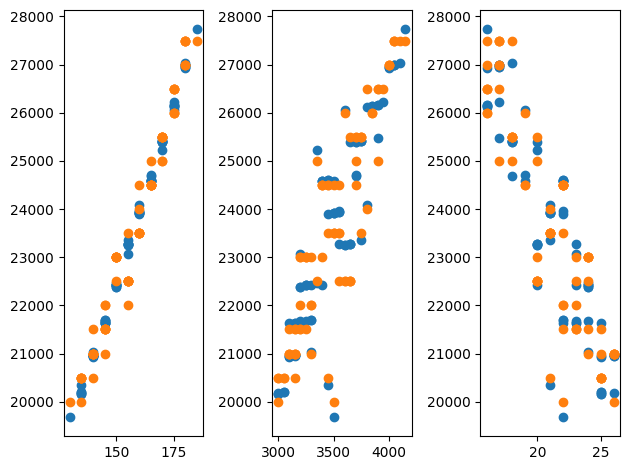

In [25]:
fig, ax = plt.subplots(1,3)
features = X.columns
for i in range(3):
    ax[i].scatter(X[features[i]].values, y_pred)
    ax[i].scatter(X[features[i]].values, y)

fig.tight_layout()
    

In [22]:
X['Horsepower'].values

features = X.columns
features

Index(['Horsepower', 'Weight', 'MPG'], dtype='object')